In [9]:
library(reshape2)
library(ggplot2)
library(dplyr)

Warning message:
“package ‘dplyr’ was built under R version 4.3.3”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
data<-read.csv("./metadata.csv",header = T,sep = ",")
head(data)

,X,seq_folder,nUMI,nGene,doublet_info,library,log10GenesPerUMI,mitoRatio,cells,sample,⋯,nFeature_RNA,leiden_res0.4,leiden_res0.5,leiden_res0.6,leiden_res0.8,leiden_res1,cluster,seurat_clusters,celltype_v1,stage
,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<chr>,<chr>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>
1,CELL2_N1_1,P6_2,1482,856,Singlet,P6_2,0.9248231,0,CELL2_N1_1,P6_2,⋯,856,5,6,7,5,8,5,5,Cuticle_3,Stage_5
2,CELL3_N1_1,P6_2,1075,574,Singlet,P6_2,0.9101089,0,CELL3_N1_1,P6_2,⋯,574,4,8,8,10,11,4,4,Apoptosis,Stage_5
3,CELL4_N1_1,P6_2,1695,865,Singlet,P6_2,0.9095267,0,CELL4_N1_1,P6_2,⋯,865,5,6,7,5,8,5,5,Cuticle_3,Stage_5
4,CELL5_N1_1,P6_2,3392,1251,Singlet,P6_2,0.8772967,0,CELL5_N1_1,P6_2,⋯,1251,5,6,7,5,14,5,5,Cuticle_3,Stage_5
5,CELL7_N1_1,P6_2,1376,755,Singlet,P6_2,0.9169471,0,CELL7_N1_1,P6_2,⋯,755,5,6,7,5,19,5,5,Cuticle_3,Stage_5
6,CELL8_N1_1,P6_2,2975,1324,Singlet,P6_2,0.8987764,0,CELL8_N1_1,P6_2,⋯,1324,8,10,11,14,16,8,8,Cuticle_2,Stage_5


In [10]:
pal=c("Cell_morphogenesis"='#1f77b4',
  "Epithelial_1"='#279e68',
        "Epithelial_2"='#98df8a',
       "Epithelial_3"='#b5bd61',
"Cuticle_1"='#d62728',
 "Cuticle_2"='#e377c2',
 "Cuticle_3"='#ff9896',
 "Immune"='#f7b6d2',
 "Apoptosis"='#aa40fc',
"Metabolic_process"='#c49c94',
 "Axon_development"='#ffbb78',
 "Ciliated_cell"='#ff7f0e'
     )

In [59]:
order =c( 
         "Ciliated_cell",
         "Axon_development",
         "Metabolic_process",
         "Apoptosis",
         "Immune",
         "Cuticle_3",
         "Cuticle_2",
         "Cuticle_1",
         "Epithelial_3",
         "Epithelial_2",
         "Epithelial_1",
         "Cell_morphogenesis"
 )

In [62]:
data$celltype_v1<-factor(data$celltype_v1,levels = order)

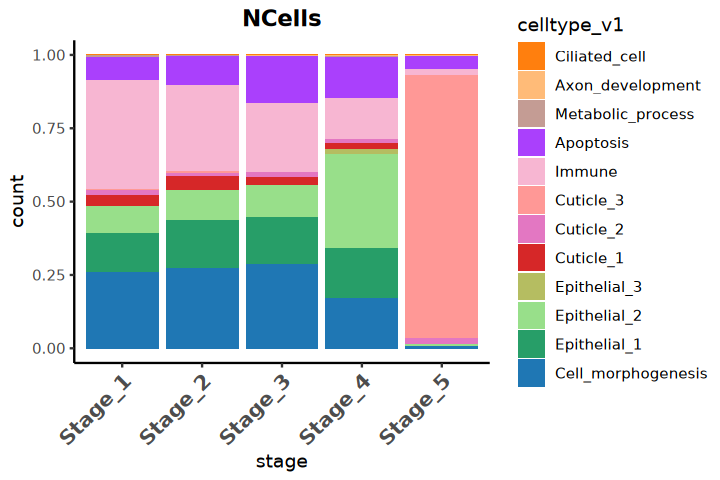

In [63]:
p5<-print(data %>%      
       ggplot(aes(x=stage, fill=celltype_v1)) +
      geom_bar(aes(fill = celltype_v1), 
                   position = 'fill') +
scale_fill_manual(values=pal)+
      theme_classic() +
      theme(axis.text.x = element_text(angle = 45,vjust = 1, hjust=1,size = 12,face="bold")) +
      theme(plot.title = element_text(hjust=0.5, face="bold")) +
      ggtitle("NCells"))

In [64]:
data$times<-ifelse(data$stage=="Stage_1",1,
                  ifelse(data$stage=="Stage_2",2,
                        ifelse(data$stage=="Stage_3",3,
                              ifelse(data$stage=="Stage_4",4,5))))

In [65]:
plot.data<-as.data.frame(table(data$celltype_v1,data$stage))
colnames(plot.data)<-c("celltype_v1","stage","count")
plot.data$celltype_v1<-as.character(plot.data$celltype_v1)
plot.data$stage<-as.character(plot.data$stage)

In [66]:
plot.data<-plot.data %>%
  # filter(celltype_level2!='Others' )%>%
  group_by(stage,celltype_v1) %>% 
summarise(n = sum(count)) %>%mutate(percentage = n/sum(n)) 
# str(plot.data)
# write.csv(plot.data,file="fig4_cells_percentage_plot_data.csv")

`summarise()` has grouped output by 'stage'. You can override using the
`.groups` argument.


In [68]:
plot.data$celltype_v1<-factor(plot.data$celltype_v1,levels = order)

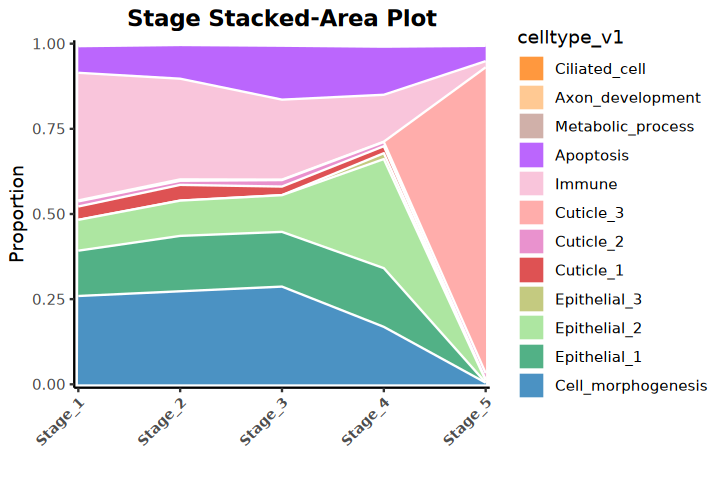

In [70]:
width=6
height=4
options(repr.plot.width = width, repr.plot.height=height)
p5<-print(ggplot(plot.data, mapping =aes(x=stage, y=percentage,group=celltype_v1,fill=celltype_v1)) +
geom_area(alpha=0.8 , size=.5, colour="white") +
scale_fill_manual(values=pal)+
      theme_classic() +
          scale_x_discrete(expand = c(0.01, 0))+ 
          scale_y_continuous(expand = c(0.01, 0))+  

      theme(axis.text.x = element_text(angle = 45,vjust = 1, hjust=1,size = 8,face="bold")) +
      theme(plot.title = element_text(hjust=0.5, face="bold")) +
      labs(x=" ",y = "Proportion",title = "Stage Stacked-Area Plot"))
